In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [278]:
data = pd.read_csv('../Processed Data/crop_recommendation.csv')

In [279]:
data.head()

N   P   K  temperature   humidity        ph    rainfall label
0  81  40  39    20.879744  82.002744  6.502985  202.935536  rice
1  87  57  44    21.770462  80.319644  7.038096  226.655537  rice
2  76  37  37    23.004459  82.320763  7.840207  263.964248  rice
3  79  40  39    26.491096  80.158363  6.980401  242.864034  rice
4  79  48  37    20.130175  81.604873  7.628473  262.717340  rice

In [235]:
data.tail()

N   P   K  temperature  humidity     ph  rainfall       label
13445  41  17  37       57.938    82.274  6.913    34.851  strawberry
13446  36  33  35      124.878    89.486  6.906    37.137  strawberry
13447  53  26  39      130.949    82.684  7.325    37.929  strawberry
13448  33  36  41      239.358    89.172  6.982    43.961  strawberry
13449  44  35  38      100.623    88.786  6.588    35.196  strawberry

In [236]:
data['label'].unique()

array(['rice', 'wheat', 'mungbean', 'tea', 'millet', 'maize', 'lentil',
       'jute', 'coffee', 'cotton', 'groundnut', 'peas', 'rubber',
       'sugarcane', 'tobacco', 'kidneybeans', 'mothbeans', 'coconut',
       'blackgram', 'adzukibeans', 'pigeonpeas', 'chickpea', 'banana',
       'grapes', 'apple', 'mango', 'muskmelon', 'orange', 'papaya',
       'pomegranate', 'watermelon', 'jowar(sorghum)', 'barley(jav)',
       'ragi(naachnnii)', 'frenchbeans(farasbi)', 'favabeans(papdi-val)',
       'limabeans(pavta)', 'clusterbeans(gavar)', 'soyabean', 'greenpeas',
       'horsegram(kulthi)', 'rapeseed(mohri)', 'corianderseeds',
       'mustardseeds', 'sesameseed', 'cuminseeds', 'brinjal', 'beetroot',
       'bittergourd', 'capsicum', 'cabbage', 'carrot', 'cauliflower',
       'cucumber', 'corianderleaves', 'curryleaves', 'drumstick–moringa',
       'chili', 'ladyfinger', 'onion', 'potato', 'radish', 'olive',
       'sweetpotato', 'fenugreekleaf(methi)', 'spinach',
       'gooseberry(amla)', 

## Separating Features and Target Label

In [237]:
features = data[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = data['label']

## Train Test Split

In [238]:
# declaring empty dictionary to add all model names and corresponding accuracies
model_accuracy = {}

In [239]:
from sklearn.model_selection import train_test_split

In [240]:
# we are splitting data into 80:20 ratio (80% for training, 20% for testing)
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Models

## Decision Tree

In [241]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [242]:
# we define max_depth to avoid overfitting data
# random_state: to randomize the sample with a state
decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=12)
decision_tree.fit(X_train, Y_train)

predicted_values = decision_tree.predict(X_test)
x = metrics.accuracy_score(Y_test, predicted_values)

model_accuracy['Decision Tree'] = x

cf_report = classification_report(Y_test, predicted_values, output_dict=True)

print('Decision Tree Model score with training data is ', decision_tree.score(X_train, Y_train))
print('Decision Tree Model score with testing data is ', decision_tree.score(X_test, Y_test))
print('Decision Tree accuracy is ', x*100)
print(classification_report(Y_test, predicted_values))

Decision Tree Model score with training data is  0.9969330855018588
Decision Tree Model score with testing data is  0.9732342007434944
Decision Tree accuracy is  97.32342007434944
                        precision    recall  f1-score   support

           adzukibeans       1.00      0.72      0.84        18
             almondnut       1.00      1.00      1.00        25
                 apple       1.00      1.00      1.00        27
               apricot       1.00      1.00      1.00        27
            asafoetida       0.94      1.00      0.97        34
              ashgourd       0.90      1.00      0.95        27
                banana       0.89      1.00      0.94        16
           barley(jav)       1.00      0.96      0.98        27
               bayleaf       1.00      1.00      1.00        34
              beetroot       1.00      1.00      1.00        29
           bittergourd       0.92      1.00      0.96        24
             blackgram       0.92      0.92      0.

### Heatmap for the classification report for Decision Trees

The classification report tells us about the following this for each class (crop):

1. **Precision** — What percent of your predictions were correct?
2. **Recall** — What percent of the positive cases did you catch?
3. **F1 score** — What percent of positive predictions were correct? The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. 
4. **Support** - Support is the number of actual occurrences of the class in the specified dataset.


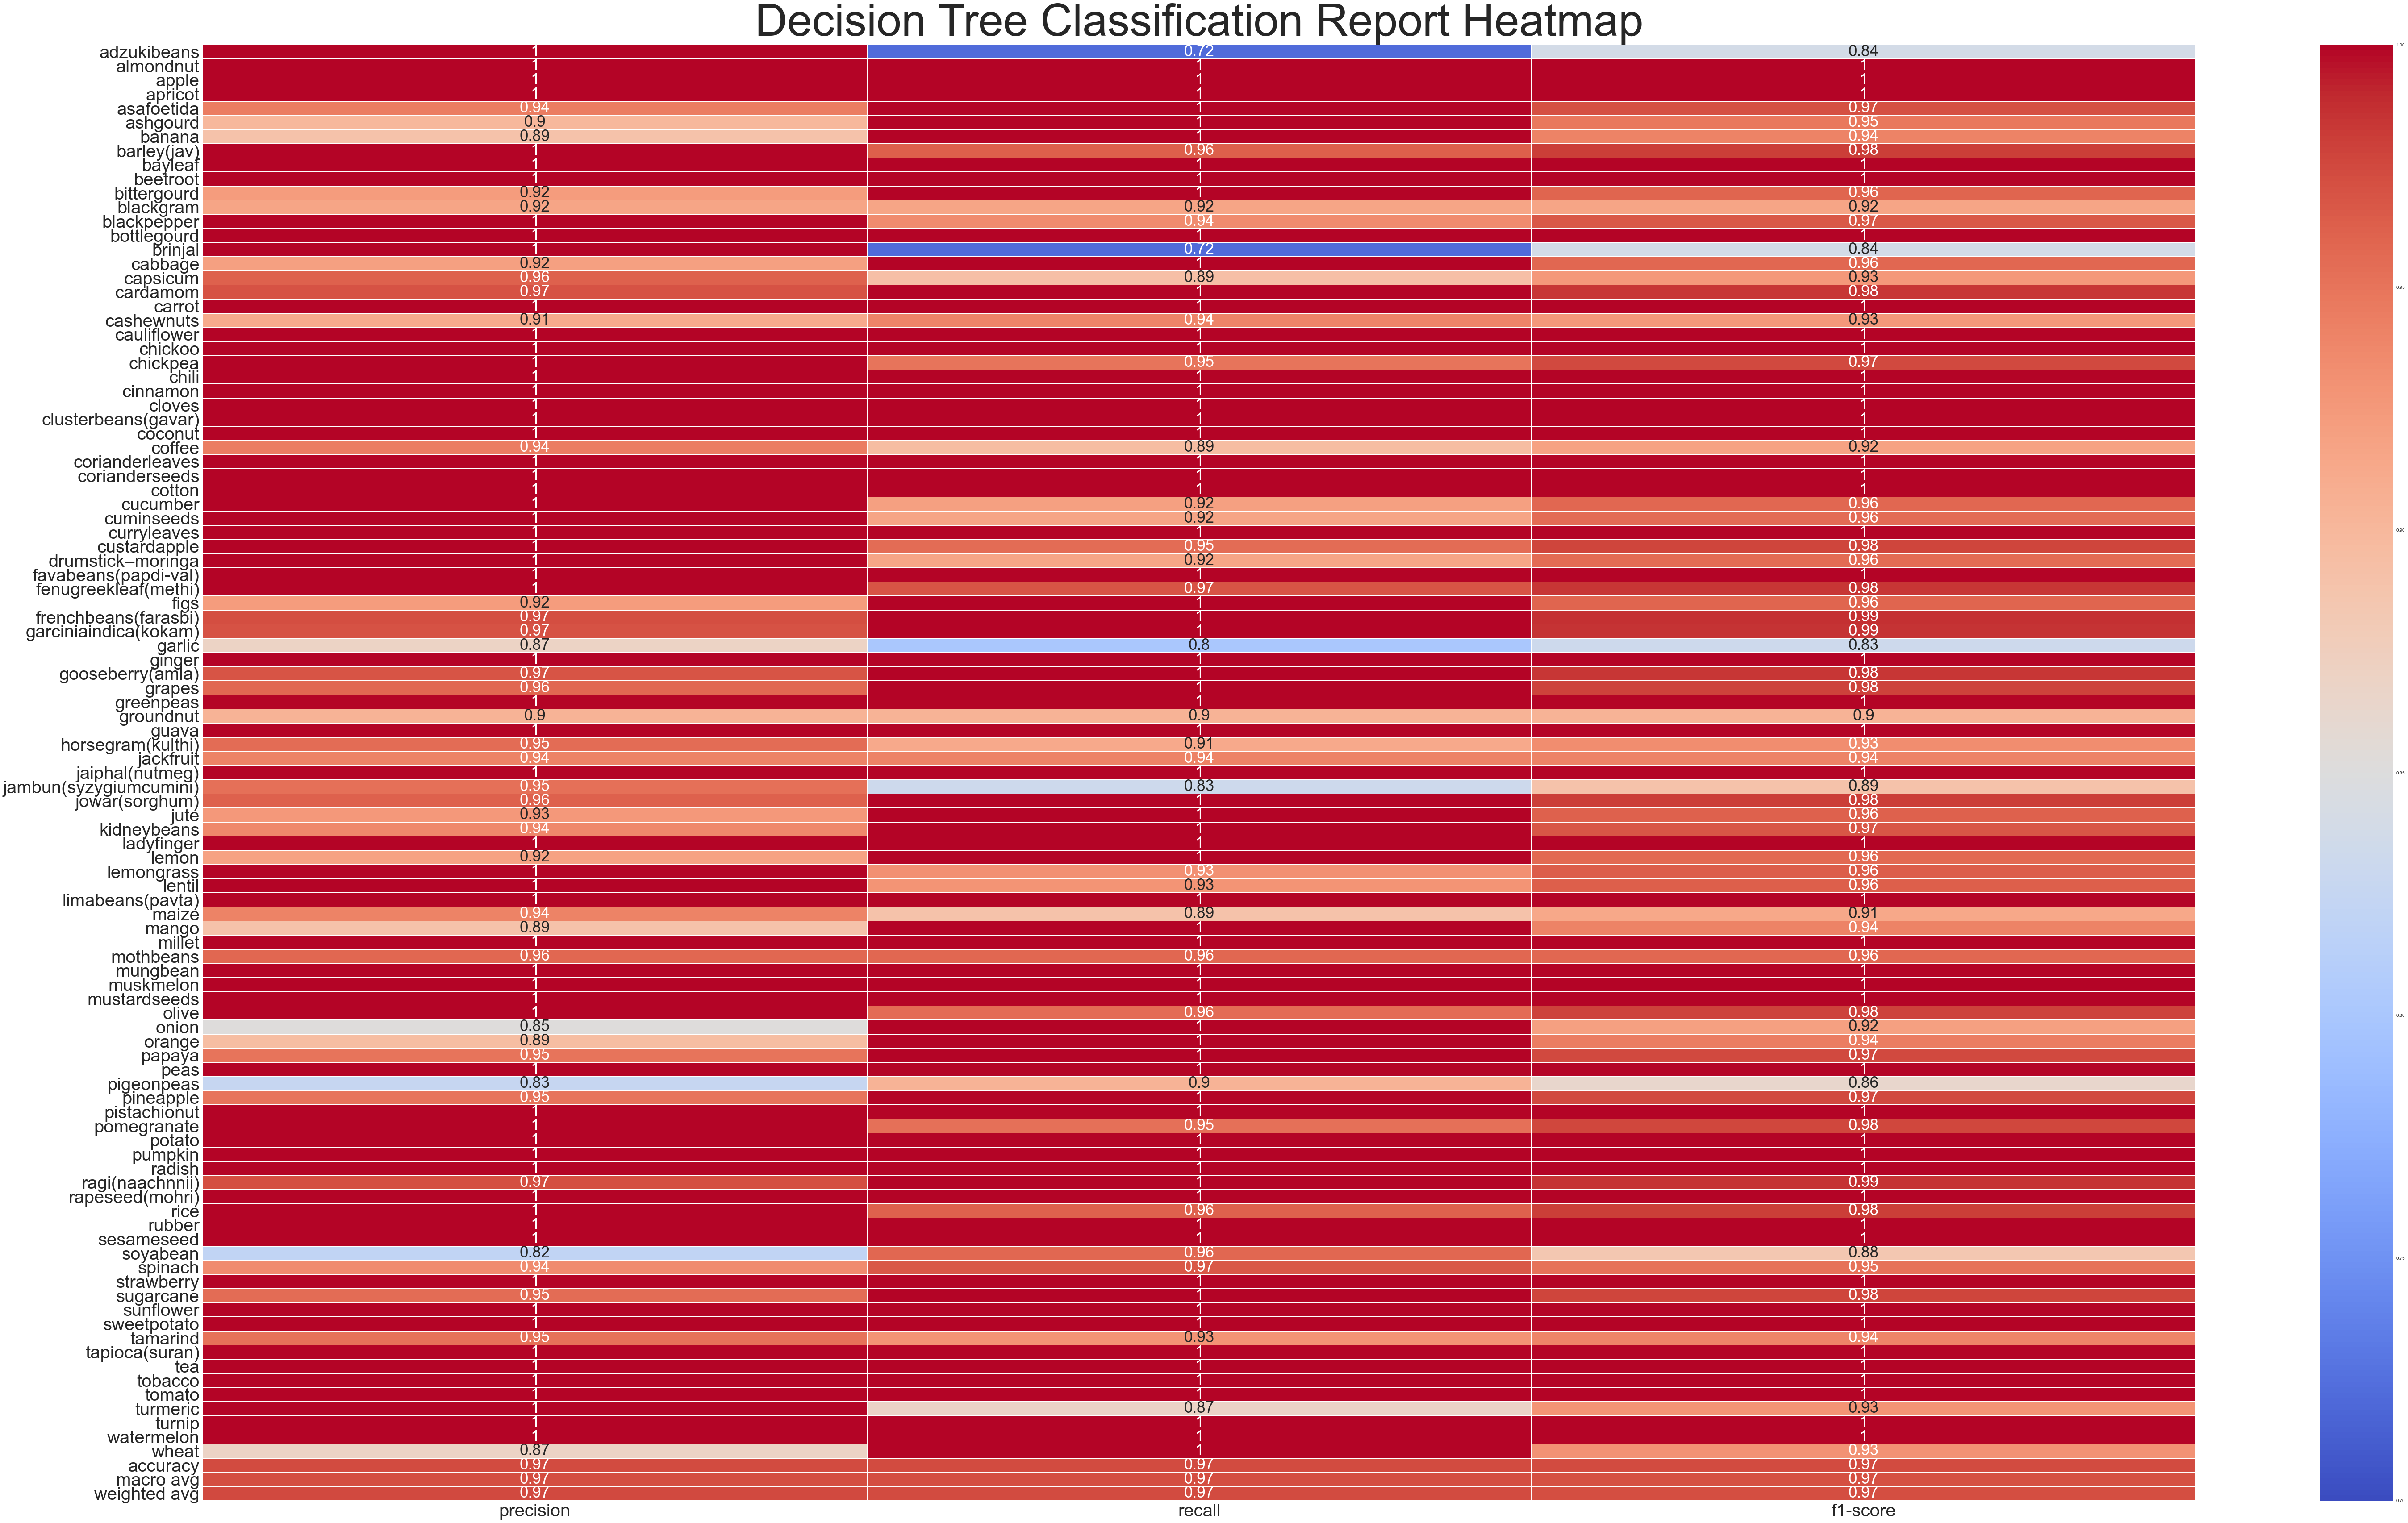

In [243]:
plt.figure(figsize=(100,60))

# we have added iloc[:-1, :] to exclude score column from plotting
# we added vmin and vmax to set minimum and maximum scale
# cmap is set to coolwarm to easily idetify the crops which are not getting classified correctly
res = sns.heatmap(pd.DataFrame(cf_report).iloc[:-1, :].T, annot=True, vmin=0.70, vmax=1,
                   annot_kws={'size': 35}, linewidths=.5, cmap='coolwarm')
res.set_xticklabels(res.get_xmajorticklabels(), fontsize=40)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize=40)

plt.title('Decision Tree Classification Report Heatmap', fontsize=100)
plt.show()

From the heatmap we can see that almost all crops have been classified correctly

- Precision: Precision is almost high for all with pigeonpeas and soyabean on the lower end
- Recall: Recall is good with a few crops like adzukibeans, brinjal, garlic and jambun
- f1-score: High for all except adzukibeans, brinjal, garlic

But overall even though precision, recall, f1 score for these few crops are low they are not very low on the scale

In [244]:
# cross validation score: Cross-validation is a statistical method used to estimate the skill of machine learning models.

from sklearn.model_selection import cross_val_score
score = cross_val_score(decision_tree, features, target, cv=5)
score

array([0.96245353, 0.97137546, 0.97249071, 0.96765799, 0.93717472])

### Save trained Decision Tree Model in a pickle file

In [245]:
import pickle

# Dump the trained Decision Tree classifier with Pickle
DT_pkl_filename = '../models/DecisionTree.pkl'

# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(decision_tree, DT_Model_pkl)

# Close the pickle instances
DT_Model_pkl.close()

## Gaussian Naive Bayes

In [246]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

NaiveBayes = GaussianNB()

NaiveBayes.fit(X_train, Y_train)

predicted_values = NaiveBayes.predict(X_test)
x = metrics.accuracy_score(Y_test, predicted_values)

model_accuracy['Naive Bayes'] = x

cf_report = classification_report(Y_test, predicted_values, output_dict=True)

print('Naive Bayes Model score with training data is ', NaiveBayes.score(X_train, Y_train))
print('Naive Bayes Model score with testing data is ', NaiveBayes.score(X_test, Y_test))
print('Naive Bayes Model accuracy is ', x*100)
print(classification_report(Y_test, predicted_values))

Naive Bayes Model score with training data is  0.9738847583643123
Naive Bayes Model score with testing data is  0.9732342007434944
Naive Bayes Model accuracy is  97.32342007434944
                        precision    recall  f1-score   support

           adzukibeans       1.00      1.00      1.00        18
             almondnut       1.00      1.00      1.00        25
                 apple       1.00      1.00      1.00        27
               apricot       1.00      1.00      1.00        27
            asafoetida       1.00      1.00      1.00        34
              ashgourd       0.96      0.89      0.92        27
                banana       0.76      1.00      0.86        16
           barley(jav)       1.00      1.00      1.00        27
               bayleaf       1.00      0.97      0.99        34
              beetroot       1.00      0.90      0.95        29
           bittergourd       1.00      1.00      1.00        24
             blackgram       0.86      1.00      0.

###  Heatmap for the classification report for Naive Bayes Classifier

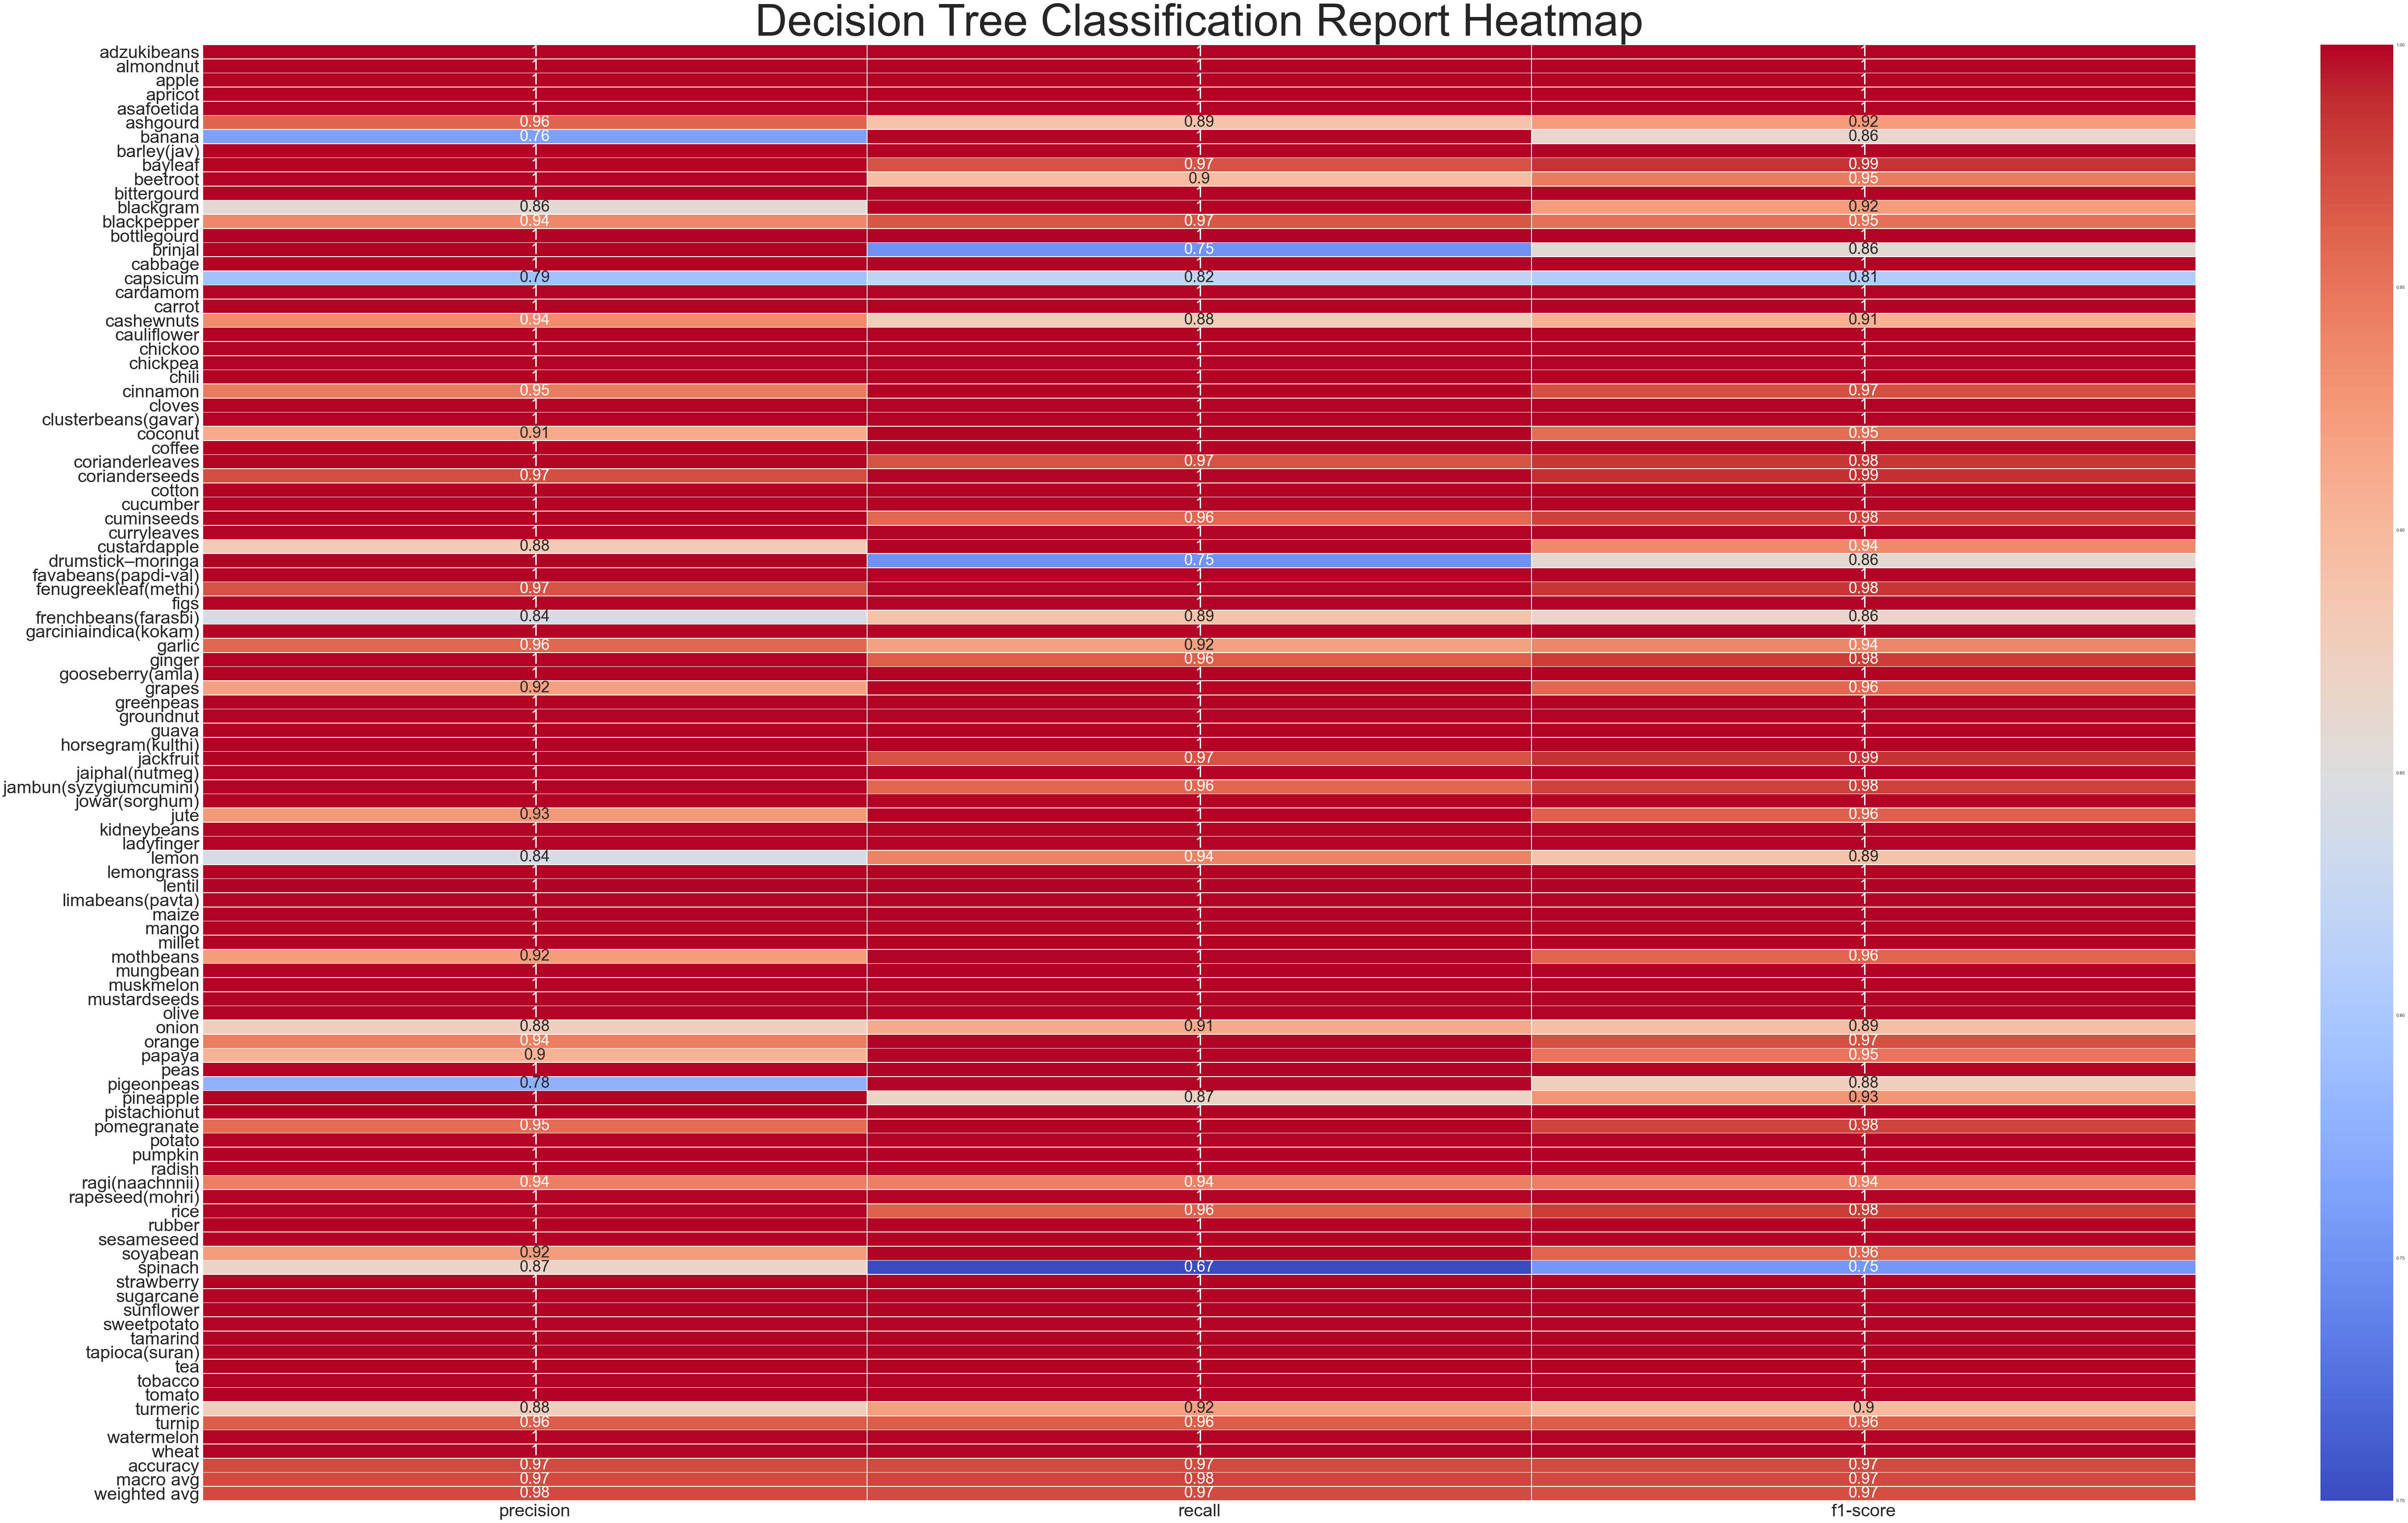

In [247]:
plt.figure(figsize=(100,60))

# we have added iloc[:-1, :] to exclude score column from plotting
# we added vmin and vmax to set minimum and maximum scale
# cmap is set to coolwarm to easily idetify the crops which are not getting classified correctly
res = sns.heatmap(pd.DataFrame(cf_report).iloc[:-1, :].T, annot=True, vmin=0.70, vmax=1,
                   annot_kws={'size': 35}, linewidths=.5, cmap='coolwarm')
res.set_xticklabels(res.get_xmajorticklabels(), fontsize=40)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize=40)

plt.title('Decision Tree Classification Report Heatmap', fontsize=100)
plt.show()

From the heatmap we can see that almost all crops have been classified correctly

- Precision: Precision is almost high for all with pigeonpeas, capsicum, bananan on the lower end
- Recall: Recall is good with a few crops like brinjal, spinach, drumstick moringa, capsicum on the lower end
- f1-score: High for all except spinach

In [248]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes, features, target, cv=5)
score

array([0.96394052, 0.98215613, 0.98475836, 0.95018587, 0.90408922])

### Save trained Naive Bayes Model in pickle file

In [249]:
import pickle

# Dump the trained Decision Tree classifier with Pickle
NB_pkl_filename = '../models/NaiveBayes.pkl'

# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)

# Close the pickle instances
NB_Model_pkl.close()

## Logistic Regression

In [250]:
from sklearn.linear_model import LogisticRegression

LogisticReg = LogisticRegression(random_state=42)
LogisticReg.fit(X_train, Y_train)

predicted_values = LogisticReg.predict(X_test)
x = metrics.accuracy_score(Y_test, predicted_values)

model_accuracy['Logistic Regression'] = x

cf_report = classification_report(Y_test, predicted_values, output_dict=True)

print('Logistic Regression Model score with training data is ', LogisticReg.score(X_train, Y_train))
print('Logistic Regression Model score with testing data is ', LogisticReg.score(X_test, Y_test))
print('Logistic Regression Model accuracy is ', x*100)
print(classification_report(Y_test, predicted_values))

Logistic Regression Model score with training data is  0.6889405204460967
Logistic Regression Model score with testing data is  0.6635687732342007
Logistic Regression Model accuracy is  66.35687732342006
                        precision    recall  f1-score   support

           adzukibeans       0.65      0.83      0.73        18
             almondnut       0.71      0.80      0.75        25
                 apple       0.86      0.89      0.87        27
               apricot       0.77      0.74      0.75        27
            asafoetida       0.92      1.00      0.96        34
              ashgourd       0.86      0.67      0.75        27
                banana       0.60      0.94      0.73        16
           barley(jav)       0.48      0.37      0.42        27
               bayleaf       0.91      0.85      0.88        34
              beetroot       0.64      0.72      0.68        29
           bittergourd       0.42      0.58      0.49        24
             blackgram     

### Heatmap for the classification report of Logistic Regression Classifier

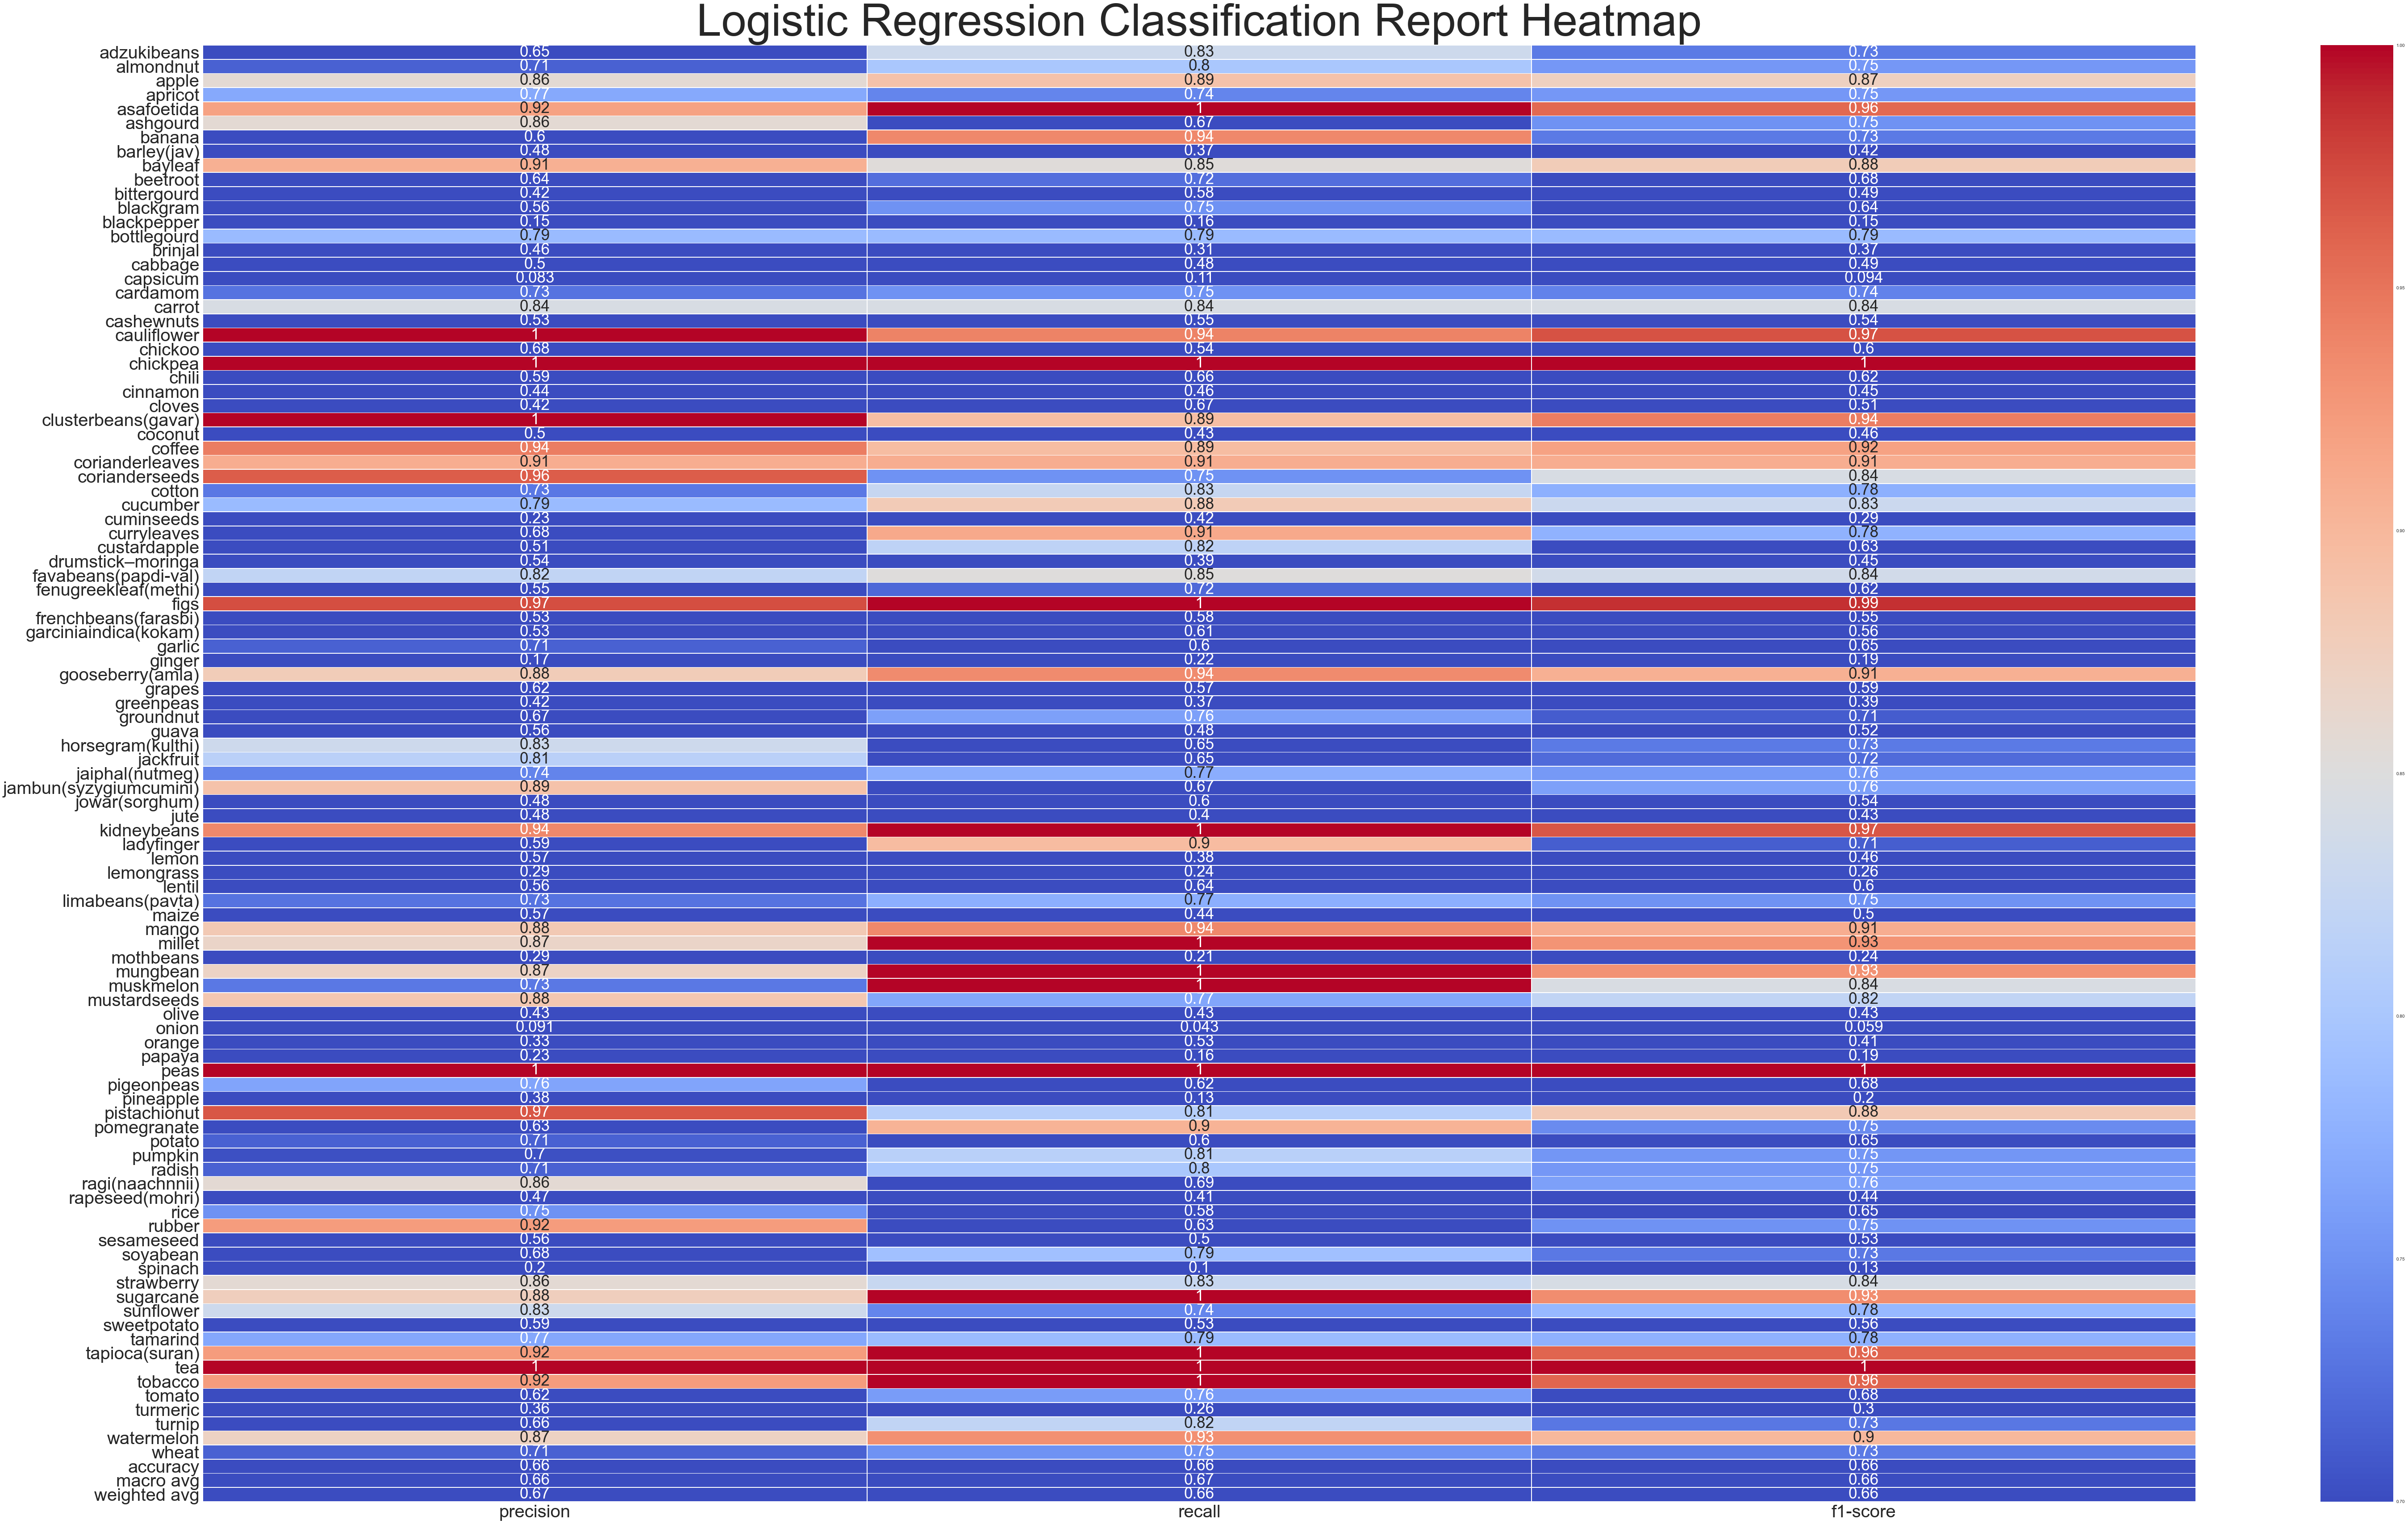

In [251]:
plt.figure(figsize=(100,60))

# we have added iloc[:-1, :] to exclude score column from plotting
# we added vmin and vmax to set minimum and maximum scale
# cmap is set to coolwarm to easily idetify the crops which are not getting classified correctly
res = sns.heatmap(pd.DataFrame(cf_report).iloc[:-1, :].T, annot=True, vmin=0.70, vmax=1,
                   annot_kws={'size': 35}, linewidths=.5, cmap='coolwarm')
res.set_xticklabels(res.get_xmajorticklabels(), fontsize=40)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize=40)

plt.title('Logistic Regression Classification Report Heatmap', fontsize=100)
plt.show()

From the heatmap we can see that logistic regression classifier does not work well for our data. It behaves poorly in terms of precision, recall, f1 score, accuracy

In [252]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogisticReg, features, target, cv=5)
score

array([0.64609665, 0.66654275, 0.69814126, 0.61710037, 0.51375465])

### Save trained Logistic Regression Model

In [253]:
import pickle

# Dump the trained Logistic Regression classifier with Pickle
LR_pkl_filename = '../models/LogisticRegression.pkl'

# Open the file to save as pkl file
LR_Model_pkl = open(LR_pkl_filename, 'wb')
pickle.dump(LogisticReg, LR_Model_pkl)

# Close the pickle instances
LR_Model_pkl.close()

## Random Forest

In [254]:
# Let's try using an ensemmble learning model since Decision Tree Classifier gave us good results
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=2)
RF.fit(X_train,Y_train)

predicted_values = RF.predict(X_test)
x = metrics.accuracy_score(Y_test, predicted_values)

print('Random Forest Model score with training data is ', RF.score(X_train, Y_train))
print('Random Forest Model score with testing data is ', RF.score(X_test, Y_test))
print('Random Forest Model accuracy is ', x*100)

Random Forest Model score with training data is  0.999907063197026
Random Forest Model score with testing data is  0.9892193308550186
Random Forest Model accuracy is  98.92193308550186


### Handle Overfitting

With the above accuracy we are clearly overfitting. We need to introduce `max_depth` also find out suitable number of estimators

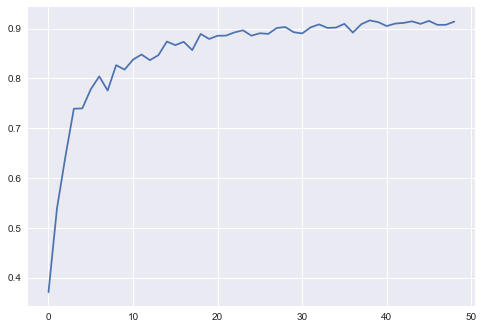

In [255]:
# choosing `max_depth` as 10 (same as that of DecisionTreeClassifier)
# let's test with n_estimator values varying between 1 - 50 and plot them to see how the accuracy varies
import matplotlib.pyplot as plt

accuracy_list = []
for i in range(1,50):
    acc = cross_val_score(RandomForestClassifier(n_estimators=i, max_depth=10), X_train, Y_train, cv=5).mean()
    accuracy_list.append(acc)
    
plt.style.use('seaborn')
plt.plot(accuracy_list)
plt.show()

In [261]:
print(np.argmax(accuracy_list))
# you get maximum accuracy when you have 38 trees

38


In [257]:
# let's train RF with 38 trees and see what accuracy it gives
RF = RandomForestClassifier(n_estimators=38, max_depth=10, criterion='entropy')
RF.fit(X_train,Y_train)

predicted_values = RF.predict(X_test)
x = metrics.accuracy_score(Y_test, predicted_values)

model_accuracy['Random Forest'] = x

cf_report = classification_report(Y_test, predicted_values, output_dict=True)

print('Random Forest Model score with training data is ', RF.score(X_train, Y_train))
print('Random Forest Model score with testing data is ', RF.score(X_test, Y_test))
print('Random Forest Model accuracy is ', x*100)
print(classification_report(Y_test, predicted_values))

Random Forest Model score with training data is  0.9961895910780669
Random Forest Model score with testing data is  0.9851301115241635
Random Forest Model accuracy is  98.51301115241635
                        precision    recall  f1-score   support

           adzukibeans       1.00      0.89      0.94        18
             almondnut       1.00      1.00      1.00        25
                 apple       1.00      1.00      1.00        27
               apricot       1.00      1.00      1.00        27
            asafoetida       1.00      1.00      1.00        34
              ashgourd       0.96      0.96      0.96        27
                banana       0.84      1.00      0.91        16
           barley(jav)       0.93      1.00      0.96        27
               bayleaf       1.00      1.00      1.00        34
              beetroot       1.00      1.00      1.00        29
           bittergourd       1.00      1.00      1.00        24
             blackgram       0.86      1.00  

### Heatmap for classification report for Random Forest Classifier

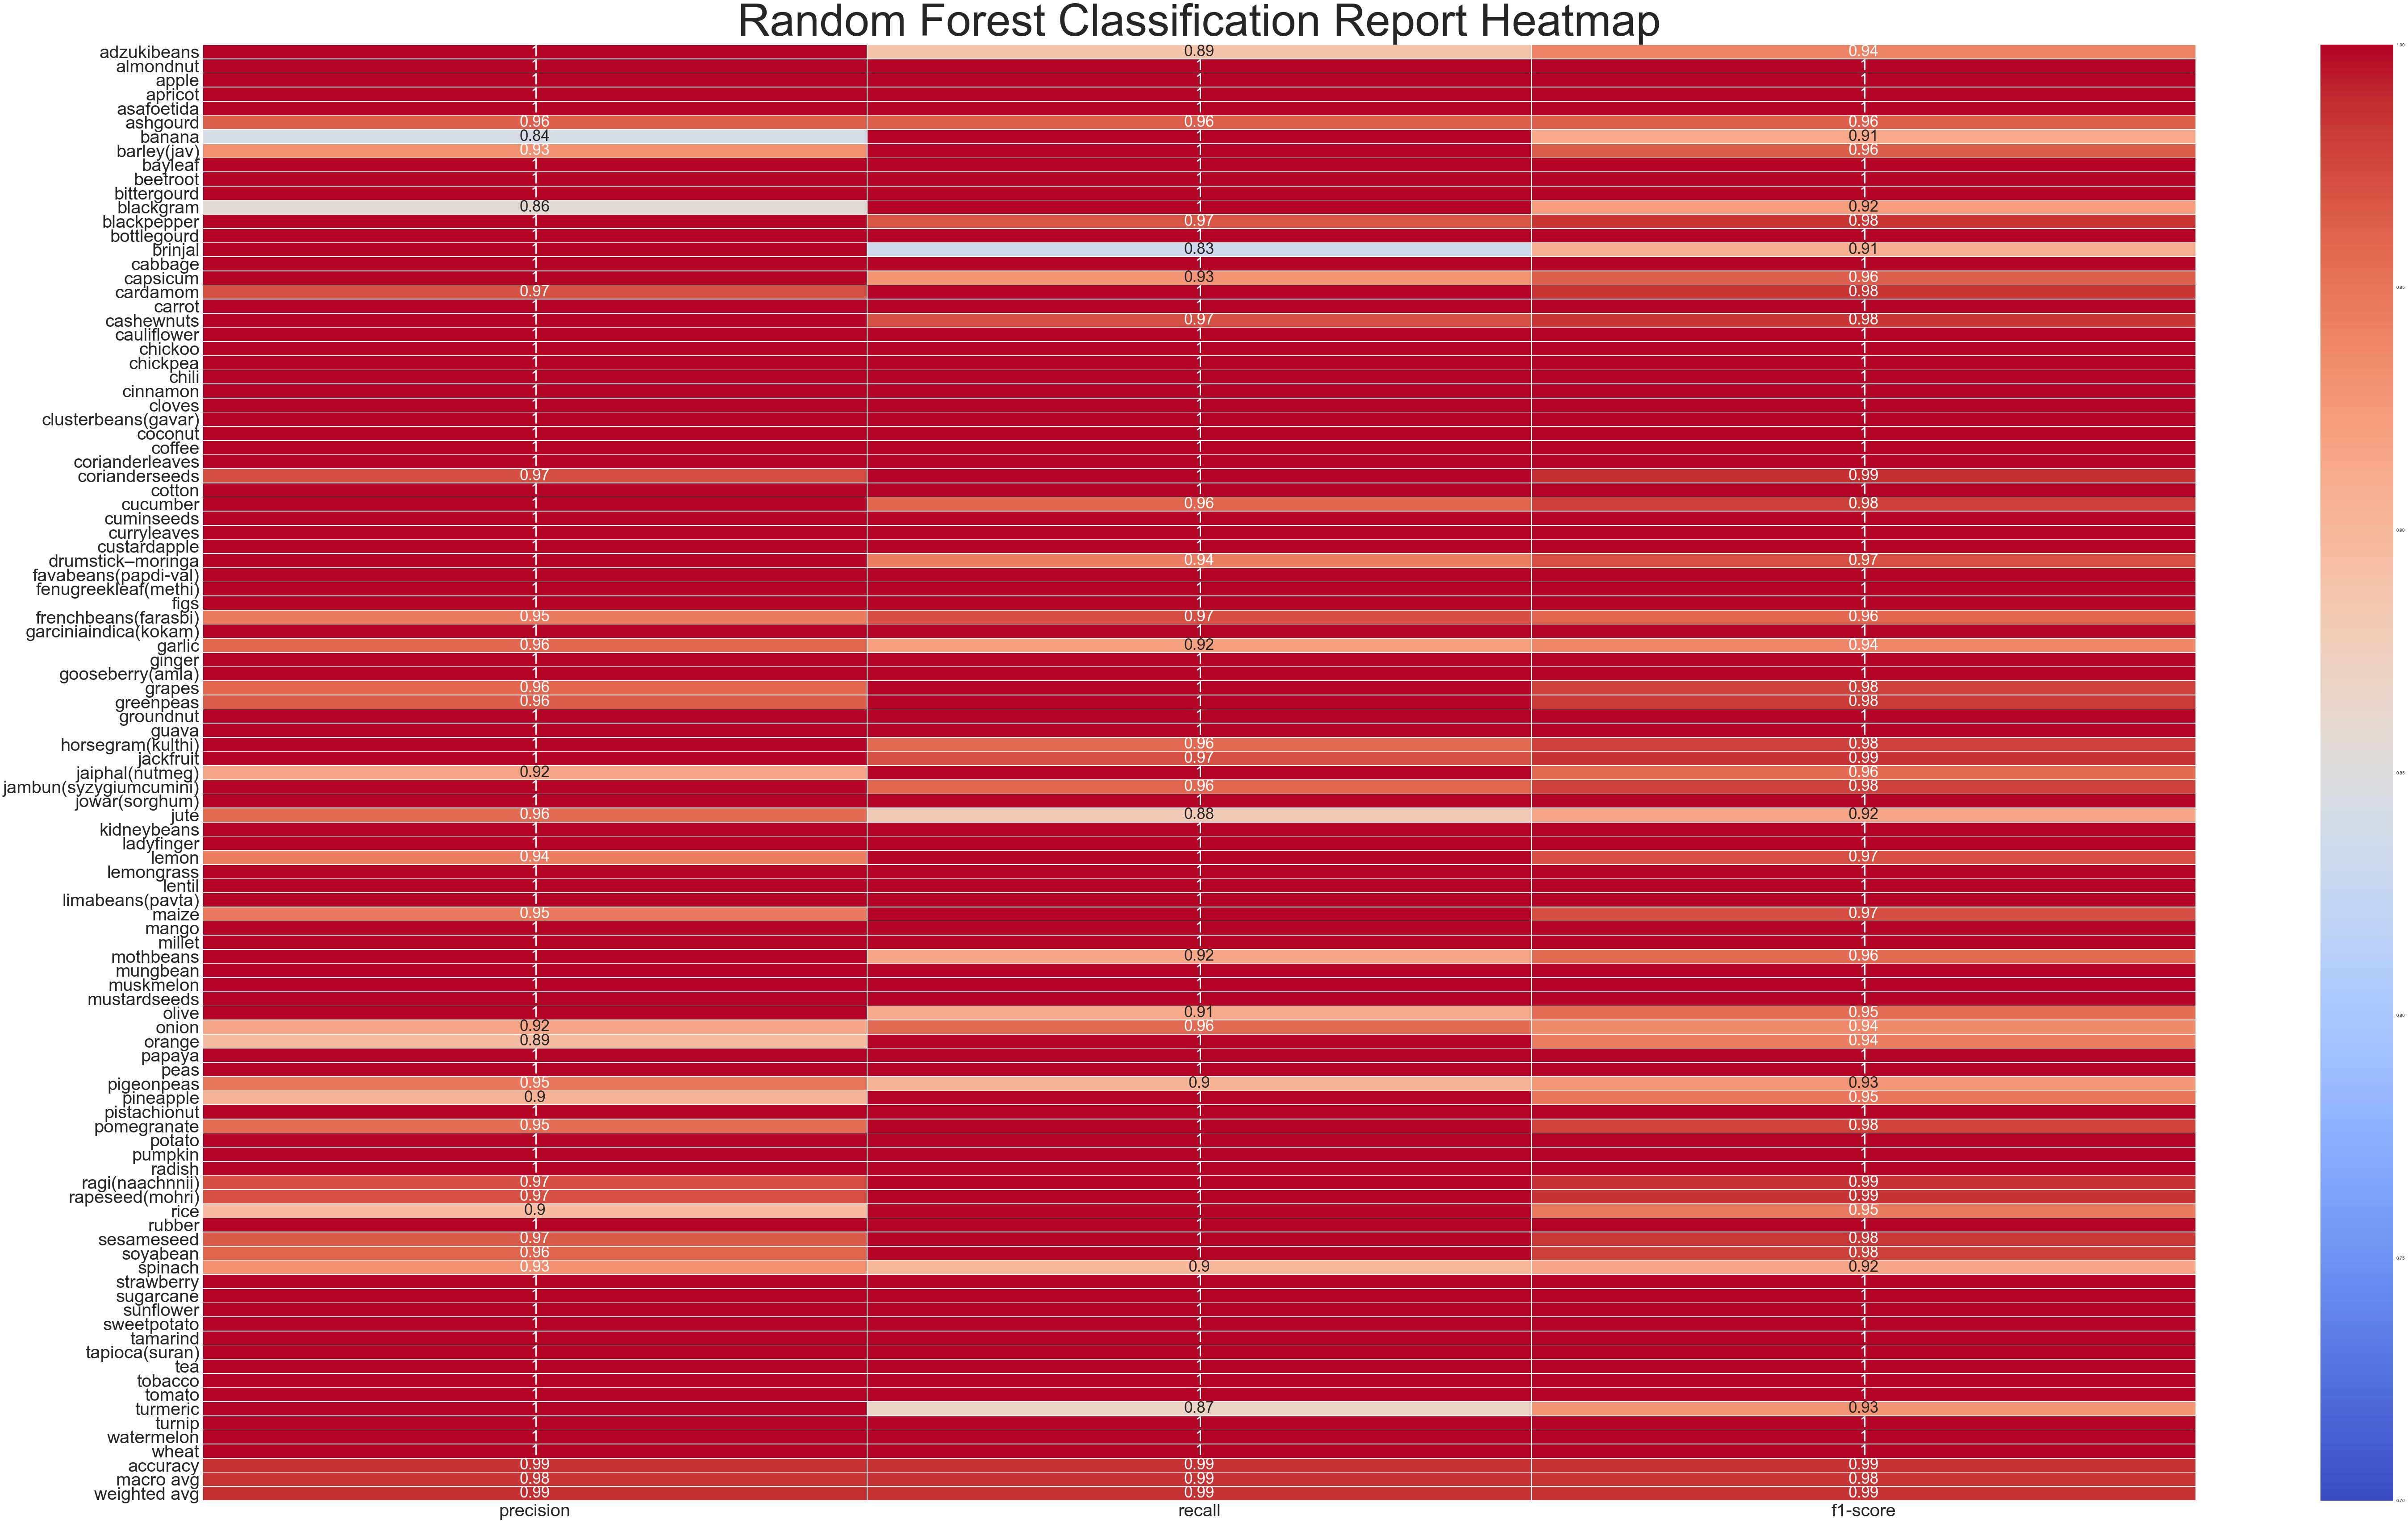

In [258]:
plt.figure(figsize=(100,60))

# we have added iloc[:-1, :] to exclude score column from plotting
# we added vmin and vmax to set minimum and maximum scale
# cmap is set to coolwarm to easily idetify the crops which are not getting classified correctly
res = sns.heatmap(pd.DataFrame(cf_report).iloc[:-1, :].T, annot=True, vmin=0.70, vmax=1,
                   annot_kws={'size': 35}, linewidths=.5, cmap='coolwarm')
res.set_xticklabels(res.get_xmajorticklabels(), fontsize=40)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize=40)

plt.title('Random Forest Classification Report Heatmap', fontsize=100)
plt.show()

From the heatmap we can see that exceptionally high amounts of crops have been classified correctly. Precision and f1 score are excellent. Even Recall is quite good except for brinjal which is slightly on the lower end

In [259]:
# Cross validation score (Random Forest)
score = cross_val_score(RF, features, target, cv=10)
score

array([0.98884758, 0.98364312, 0.98884758, 0.99256506, 0.99330855,
       0.99479554, 0.99405204, 0.97620818, 0.97249071, 0.97174721])

### Saving trained Random Forest Model

In [260]:
import pickle

# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = '../models/RandomForest.pkl'

# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)

# Close the pickle instances
RF_Model_pkl.close()

## Accuracy Comparison

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

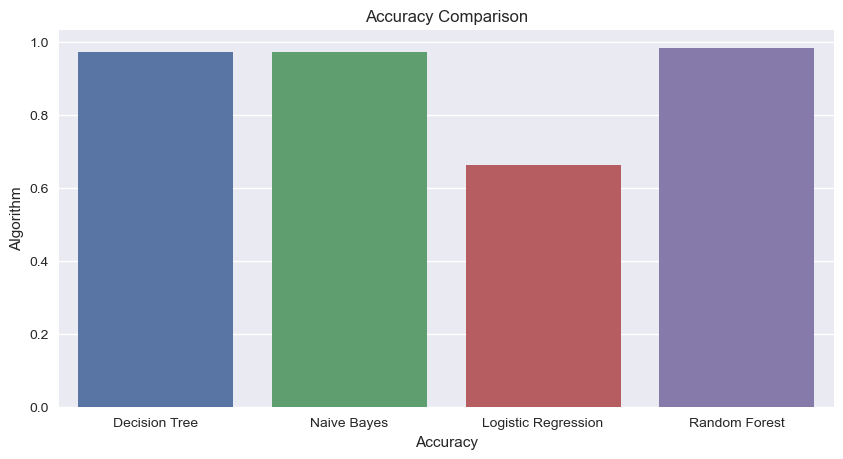

In [268]:
plt.figure(figsize=[10,5], dpi=100)
plt.title('Accuracy Comparison')

plt.xlabel('Accuracy')
plt.ylabel('Algorithm')

models = list(model_accuracy.keys())
accuracies = list(model_accuracy.values())

sns.barplot(x=models, y=accuracies)

In [269]:
accuracy_models = dict(zip(model, accuracies))

for k, v in accuracy_models.items():
    print (k, '==>', v)

Decision Tree ==> 0.9732342007434944
Naive Bayes ==> 0.9732342007434944
Logistic Regression ==> 0.6635687732342007
Random Forest ==> 0.9851301115241635


## Making a prediction

In [280]:
data_input = np.array([[104, 18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data_input)
print(prediction)

['coffee']


In [281]:
data_input = np.array([[100, 120, 70, 25, 80, 6.3, 60]])
prediction = RF.predict(data_input)
print(prediction)

['pumpkin']


In [311]:
# top  5 crops
data_input = np.array([[100, 120, 70, 25, 80, 6.3, 60]])
probs = RF.predict_proba(data_input)
sorted(zip(RF.classes_, probs[0]), key=lambda x:x[1], reverse=True)[:5]

[('pumpkin', 0.1901084949215143),
 ('soyabean', 0.1573551794465922),
 ('custardapple', 0.12754566916616777),
 ('brinjal', 0.09318251769775315),
 ('tomato', 0.07894736842105263)]

In [312]:
# top 5 crops
data_input = np.array([[104, 18, 30, 23.603016, 60.3, 6.7, 140.91]])
probs = RF.predict_proba(data_input)
sorted(zip(RF.classes_, probs[0]), key=lambda x:x[1], reverse=True)[:5]

[('coffee', 0.9624069356812969),
 ('rapeseed(mohri)', 0.016140350877192983),
 ('maize', 0.007394443045412574),
 ('adzukibeans', 0.006315048705507612),
 ('jaiphal(nutmeg)', 0.003987240829346092)]